In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]]

'Coat'

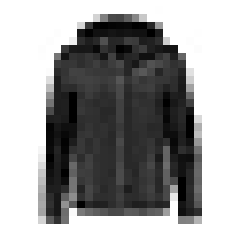

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

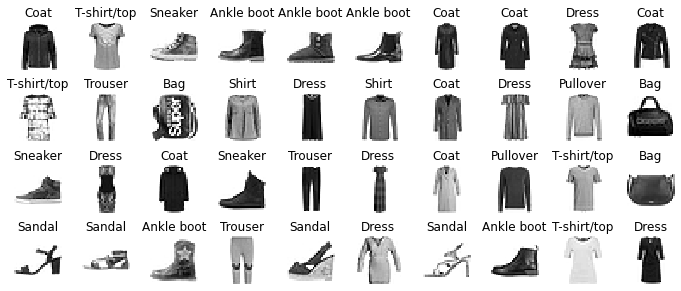

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


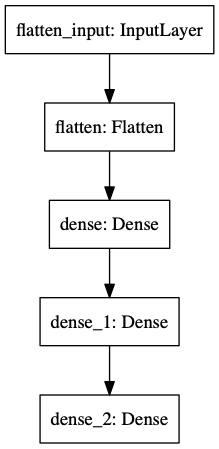

In [14]:
keras.utils.plot_model(model)

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04154596, -0.0686364 , -0.07123313, ...,  0.02923479,
        -0.05047287, -0.049542  ],
       [ 0.04186777, -0.0531752 ,  0.05418272, ...,  0.02335396,
        -0.04797577,  0.00445048],
       [-0.02755682,  0.05315007, -0.06261455, ...,  0.05903654,
        -0.0363731 , -0.01692264],
       ...,
       [-0.06070986,  0.04609746,  0.06954904, ...,  0.02679771,
         0.01654264,  0.03701328],
       [ 0.06257907, -0.03118884, -0.02175766, ..., -0.07296535,
         0.05566779, -0.06306524],
       [ 0.03762037, -0.0444679 ,  0.05687791, ..., -0.07094031,
        -0.05019648,  0.05269486]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=["accuracy"])

In [20]:
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7046 - accuracy: 0.7716 - val_loss: 0.4952 - val_accuracy: 0.8352
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4859 - accuracy: 0.8314 - val_loss: 0.4491 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4423 - accuracy: 0.8447 - val_loss: 0.4134 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4155 - accuracy: 0.8553 - val_loss: 0.4010 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3964 - accuracy: 0.8607 - val_loss: 0.4067 - val_accuracy: 0.8580
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3802 - accuracy: 0.8666 - val_loss: 0.3763 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8696 - val_loss: 0.3718 - val_accuracy:

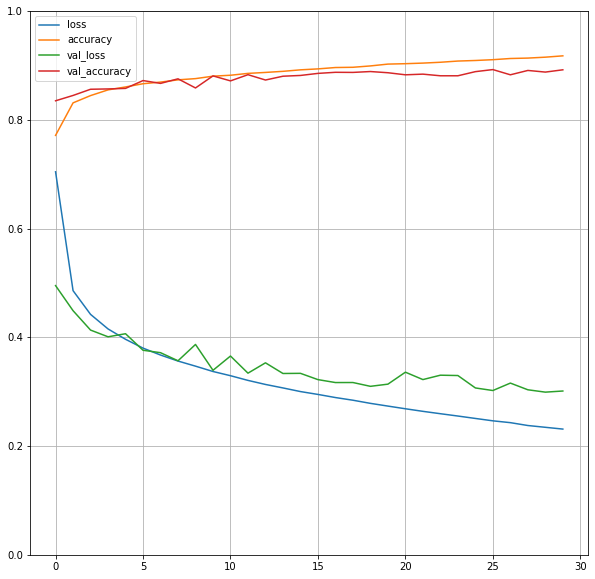

In [21]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 61.5969 - accuracy: 0.8508


[61.59685134887695, 0.8507999777793884]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import numpy as np
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

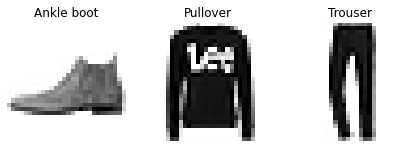

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 0s 857us/step - loss: 0.7308 - val_loss: 5.3425
Epoch 2/20
363/363 [==============================] - 0s 658us/step - loss: 0.4826 - val_loss: 0.4554
Epoch 3/20
363/363 [==============================] - 0s 658us/step - loss: 0.4239 - val_loss: 0.4530
Epoch 4/20
363/363 [==============================] - 0s 742us/step - loss: 0.3945 - val_loss: 0.5745
Epoch 5/20
363/363 [==============================] - 0s 688us/step - loss: 0.3795 - val_loss: 0.4599
Epoch 6/20
363/363 [==============================] - 0s 654us/step - loss: 0.3799 - val_loss: 0.3997
Epoch 7/20
363/363 [==============================] - 0s 666us/step - loss: 0.3654 - val_loss: 0.4294
Epoch 8/20
363/363 [==============================] - 0s 728us/step - loss: 0.3634 - val_loss: 0.3880
Epoch 9/20
363/363 [==============================] - 0s 847us/step - loss: 0.3603 - val_loss: 0.4120
Epoch 10/20
363/363 [==============================] - 0s 816us/step - loss: 0.354

In [28]:
mse_test

0.687583327293396

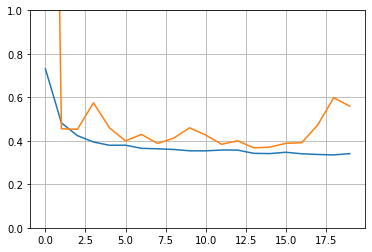

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [31]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.2933 - val_loss: 3.0083
Epoch 2/20
363/363 [==============================] - 0s 963us/step - loss: 0.8007 - val_loss: 0.7788
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6500 - val_loss: 0.6591
Epoch 4/20
363/363 [==============================] - 0s 972us/step - loss: 0.5959 - val_loss: 0.6293
Epoch 5/20
363/363 [==============================] - 0s 961us/step - loss: 0.5646 - val_loss: 0.6194
Epoch 6/20
363/363 [==============================] - 0s 965us/step - loss: 0.5408 - val_loss: 0.5887
Epoch 7/20
363/363 [==============================] - 0s 964us/step - loss: 0.5215 - val_loss: 0.5979
Epoch 8/20
363/363 [==============================] - 0s 959us/step - loss: 0.5050 - val_loss: 0.5615
Epoch 9/20
363/363 [==============================] - 0s 966us/step - loss: 0.4922 - val_loss: 0.5495
Epoch 10/20
363/363 [==============================] - 0s 953us/step - loss: 0.4800 - 

In [32]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [33]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [34]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.6509 - main_output_loss: 2.4247 - aux_output_loss: 4.6862 - val_loss: 1.3758 - val_main_output_loss: 0.9803 - val_aux_output_loss: 4.9356
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0876 - main_output_loss: 0.7999 - aux_output_loss: 3.6767 - val_loss: 1.0768 - val_main_output_loss: 0.7620 - val_aux_output_loss: 3.9101
Epoch 3/20
363/363 [==============================] - 0s 957us/step - loss: 0.8847 - main_output_loss: 0.6815 - aux_output_loss: 2.7136 - val_loss: 0.9522 - val_main_output_loss: 0.6962 - val_aux_output_loss: 3.2568
Epoch 4/20
363/363 [==============================] - 0s 839us/step - loss: 0.7870 - main_output_loss: 0.6337 - aux_output_loss: 2.1665 - val_loss: 0.8839 - val_main_output_loss: 0.6645 - val_aux_output_loss: 2.8583
Epoch 5/20
363/363 [==============================] - 0s 941us/step - loss: 0.7299 - main_output_loss: 0.6039 - aux_output_loss: 1.8632 - va

In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [40]:


model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))



Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 3.5399 - output_1_loss: 3.3084 - output_2_loss: 5.6241 - val_loss: 1.8939 - val_output_1_loss: 1.4929 - val_output_2_loss: 5.5030
Epoch 2/10
363/363 [==============================] - 0s 982us/step - loss: 1.2109 - output_1_loss: 0.8985 - output_2_loss: 4.0223 - val_loss: 1.1590 - val_output_1_loss: 0.7670 - val_output_2_loss: 4.6861
Epoch 3/10
363/363 [==============================] - 0s 997us/step - loss: 0.8862 - output_1_loss: 0.6631 - output_2_loss: 2.8938 - val_loss: 1.0247 - val_output_1_loss: 0.6662 - val_output_2_loss: 4.2514
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7671 - output_1_loss: 0.6023 - output_2_loss: 2.2505 - val_loss: 0.9777 - val_output_1_loss: 0.6438 - val_output_2_loss: 3.9819
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7018 - output_1_loss: 0.5701 - output_2_loss: 1.8878 - val_loss: 0.9243 - val_output_1_loss: 0.6167 - va

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 867us/step - loss: 1.8394 - val_loss: 0.9927
Epoch 2/10
363/363 [==============================] - 0s 754us/step - loss: 0.6435 - val_loss: 0.6665
Epoch 3/10
363/363 [==============================] - 0s 764us/step - loss: 0.5746 - val_loss: 0.6236
Epoch 4/10
363/363 [==============================] - 0s 830us/step - loss: 0.5401 - val_loss: 0.5864
Epoch 5/10
363/363 [==============================] - 0s 789us/step - loss: 0.5133 - val_loss: 0.5464
Epoch 6/10
363/363 [==============================] - 0s 716us/step - loss: 0.4921 - val_loss: 0.5252
Epoch 7/10
363/363 [==============================] - 0s 712us/step - loss: 0.4745 - val_loss: 0.5133
Epoch 8/10
363/363 [==============================] - 0s 719us/step - loss: 0.4602 - val_loss: 0.4953
Epoch 9/10
363/363 [==============================] - 0s 638us/step - loss: 0.4484 - val_loss: 0.4896
Epoch 10/10
162/162 [==============================] - 0s 474us/step - loss: 0.450

In [45]:
model.save("my_keras_model.h5")

In [46]:
model = keras.models.load_model("my_keras_model.h5")

In [47]:
model.predict(X_new)

array([[1.0770886],
       [1.2102753],
       [0.5938902]], dtype=float32)

In [48]:
model.save_weights("my_keras_weights.ckpt")

In [49]:
model.load_weights("my_keras_weights.ckpt")

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 906us/step - loss: 1.8394 - val_loss: 0.9927
Epoch 2/10
363/363 [==============================] - 0s 752us/step - loss: 0.6435 - val_loss: 0.6665
Epoch 3/10
363/363 [==============================] - 0s 725us/step - loss: 0.5746 - val_loss: 0.6236
Epoch 4/10
363/363 [==============================] - 0s 809us/step - loss: 0.5401 - val_loss: 0.5864
Epoch 5/10
363/363 [==============================] - 0s 725us/step - loss: 0.5133 - val_loss: 0.5464
Epoch 6/10
363/363 [==============================] - 0s 711us/step - loss: 0.4921 - val_loss: 0.5252
Epoch 7/10
363/363 [==============================] - 0s 845us/step - loss: 0.4745 - val_loss: 0.5133
Epoch 8/10
363/363 [==============================] - 0s 735us/step - loss: 0.4602 - val_loss: 0.4953
Epoch 9/10
363/363 [==============================] - 0s 743us/step - loss: 0.4484 - val_loss: 0.4896
Epoch 10/10
162/162 [==============================] - 0s 575us/step - loss: 0.450

In [53]:


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)



Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4304 - val_loss: 0.4604
Epoch 2/100
363/363 [==============================] - 0s 712us/step - loss: 0.4226 - val_loss: 0.4619
Epoch 3/100
363/363 [==============================] - 0s 682us/step - loss: 0.4168 - val_loss: 0.4578
Epoch 4/100
363/363 [==============================] - 0s 803us/step - loss: 0.4116 - val_loss: 0.4429
Epoch 5/100
363/363 [==============================] - 0s 709us/step - loss: 0.4063 - val_loss: 0.4340
Epoch 6/100
363/363 [==============================] - 0s 830us/step - loss: 0.4020 - val_loss: 0.4284
Epoch 7/100
363/363 [==============================] - 0s 792us/step - loss: 0.3980 - val_loss: 0.4281
Epoch 8/100
363/363 [==============================] - 0s 761us/step - loss: 0.3943 - val_loss: 0.4205
Epoch 9/100
363/363 [==============================] - 0s 776us/step - loss: 0.3911 - val_loss: 0.4184
Epoch 10/100
363/363 [==============================] - 0s 777us/step - los

Epoch 80/100
363/363 [==============================] - 0s 657us/step - loss: 0.3181 - val_loss: 0.3490
Epoch 81/100
363/363 [==============================] - 0s 638us/step - loss: 0.3176 - val_loss: 0.3589
Epoch 82/100
363/363 [==============================] - 0s 618us/step - loss: 0.3175 - val_loss: 0.3490
Epoch 83/100
363/363 [==============================] - 0s 628us/step - loss: 0.3170 - val_loss: 0.3587
Epoch 84/100
363/363 [==============================] - 0s 632us/step - loss: 0.3168 - val_loss: 0.3550
Epoch 85/100
363/363 [==============================] - 0s 611us/step - loss: 0.3166 - val_loss: 0.3504
Epoch 86/100
363/363 [==============================] - 0s 632us/step - loss: 0.3160 - val_loss: 0.3548
Epoch 87/100
363/363 [==============================] - 0s 633us/step - loss: 0.3160 - val_loss: 0.3494
Epoch 88/100
363/363 [==============================] - 0s 636us/step - loss: 0.3153 - val_loss: 0.3525
Epoch 89/100
363/363 [==============================] - 0s 660us

In [57]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train khoadeptrai: {:.2f}".format(logs["val_loss"] / logs["loss"]))


val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])
    

298/363 [=======================>......] - ETA: 0s - loss: 0.3160
val/train khoadeptrai: 1.12
363/363 [==============================] - 0s 735us/step - loss: 0.3106 - val_loss: 0.3483


In [58]:
import os 
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [61]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 6.3390WARNING:tensorflow:From /Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 1.8394 - val_loss: 0.9927
Epoch 2/30
363/363 [==============================] - 0s 781us/step - loss: 0.6435 - val_loss: 0.6665
Epoch 3/30
363/363 [==============================] - 0s 778us/step - loss: 0.5746 - val_loss: 0.6236
Epoch 4/30
363/363 [==============================] - 0s 676us/step - loss: 0.5401 - val_loss: 0.5864
Epoch 5/30
363/363 [==============================] - 0s 805us/step - loss: 0.5133 - val_loss: 0.5464
Epoch 6/30
363/363 [==============================] - 0s 669us/step - loss: 0.4921 - val_loss: 0.5252
Epoch 7/30
363/363 [====

In [62]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [63]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_08_13-17_04_07'

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [66]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5277 - val_loss: 1.1932
Epoch 2/30
363/363 [==============================] - 0s 692us/step - loss: 0.3811 - val_loss: 2.0045
Epoch 3/30
363/363 [==============================] - 0s 688us/step - loss: 0.3562 - val_loss: 0.3733
Epoch 4/30
363/363 [==============================] - 0s 958us/step - loss: 0.3424 - val_loss: 0.3722
Epoch 5/30
363/363 [==============================] - 0s 729us/step - loss: 0.3339 - val_loss: 0.4267
Epoch 6/30
363/363 [==============================] - 0s 700us/step - loss: 0.3245 - val_loss: 0.4205
Epoch 7/30
363/363 [==============================] - 0s 681us/step - loss: 0.3313 - val_loss: 0.8300
Epoch 8/30
363/363 [==============================] - 0s 786us/step - loss: 0.3286 - val_loss: 0.3376
Epoch 9/30
363/363 [==============================] - 0s 843us/step - loss: 0.3160 - val_loss: 0.3604
Epoch 10/30
363/363 [==============================] - 0s 757us/step - loss: 0.3123 

In [67]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [70]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [71]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 829us/step - loss: 1.0355 - val_loss: 3.7861
Epoch 2/100
363/363 [==============================] - 0s 641us/step - loss: 0.6216 - val_loss: 0.6356
Epoch 3/100
363/363 [==============================] - 0s 667us/step - loss: 0.5029 - val_loss: 0.5268
Epoch 4/100
363/363 [==============================] - 0s 725us/step - loss: 0.4660 - val_loss: 0.4940
Epoch 5/100
363/363 [==============================] - 0s 669us/step - loss: 0.4416 - val_loss: 0.4732
Epoch 6/100
363/363 [==============================] - 0s 642us/step - loss: 0.4265 - val_loss: 0.4564
Epoch 7/100
363/363 [==============================] - 0s 665us/step - loss: 0.4152 - val_loss: 0.4447
Epoch 8/100
363/363 [==============================] - 0s 665us/step - loss: 0.4065 - val_loss: 0.4403
Epoch 9/100
363/363 [==============================] - 0s 649us/step - loss: 0.4017 - val_loss: 0.4291
Epoch 10/100
363/363 [==============================] - 0s 648us/step - l

Epoch 80/100
363/363 [==============================] - 0s 631us/step - loss: 0.3213 - val_loss: 0.3597
Epoch 81/100
363/363 [==============================] - 0s 596us/step - loss: 0.3211 - val_loss: 0.3560
Epoch 82/100
363/363 [==============================] - 0s 638us/step - loss: 0.3204 - val_loss: 0.3534
Epoch 83/100
363/363 [==============================] - 0s 619us/step - loss: 0.3198 - val_loss: 0.3590
Epoch 84/100
363/363 [==============================] - 0s 601us/step - loss: 0.3203 - val_loss: 0.3552
Epoch 85/100
363/363 [==============================] - 0s 588us/step - loss: 0.3198 - val_loss: 0.3534
Epoch 86/100
363/363 [==============================] - 0s 592us/step - loss: 0.3192 - val_loss: 0.3522
Epoch 87/100
363/363 [==============================] - 0s 619us/step - loss: 0.3186 - val_loss: 0.3550
Epoch 88/100
363/363 [==============================] - 0s 628us/step - loss: 0.3178 - val_loss: 0.3762
Epoch 89/100
363/363 [==============================] - 0s 591us

In [72]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 572us/step - loss: 0.3794


In [73]:
y_pred = keras_reg.predict(X_new)

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 974us/step - loss: 5.4674 - val_loss: 4.1210
Epoch 2/100
242/242 [==============================] - 0s 755us/step - loss: 3.0766 - val_loss: 2.4825
Epoch 3/100
242/242 [==============================] - 0s 733us/step - loss: 1.9226 - val_loss: 1.7019
Epoch 4/100
242/242 [==============================] - 0s 887us/step - loss: 1.3447 - val_loss: 1.3145
Epoch 5/100
242/242 [==============================] - 0s 958us/step - loss: 1.0471 - val_loss: 1.1223
Epoch 6/100
242/242 [==============================] - 0s 771us/step - loss: 0.8892 - val_loss: 1.0162
Epoch 7/100
242/242 [==============================] - 0s 936us/step - loss: 0.8023 - val_loss: 0.9579
Epoch 8/100
242/242 [==============================] - 0s 760us/step - loss: 0.7522 - val_loss: 0.9082
Epoch 9/100
242/242 [==============================] - 0s 723us/step - loss: 0.7208 - val_loss: 0.8770
Epoch 10/100
242/242 [==============================] - 0s 753us/step - l

Epoch 80/100
242/242 [==============================] - 0s 725us/step - loss: 0.5070 - val_loss: 0.6175
Epoch 81/100
242/242 [==============================] - 0s 694us/step - loss: 0.5068 - val_loss: 0.6116
Epoch 82/100
242/242 [==============================] - 0s 702us/step - loss: 0.5064 - val_loss: 0.6214
Epoch 83/100
242/242 [==============================] - 0s 778us/step - loss: 0.5065 - val_loss: 0.6163
Epoch 84/100
242/242 [==============================] - 0s 706us/step - loss: 0.5059 - val_loss: 0.6253
Epoch 85/100
242/242 [==============================] - 0s 711us/step - loss: 0.5061 - val_loss: 0.6271
Epoch 86/100
242/242 [==============================] - 0s 692us/step - loss: 0.5061 - val_loss: 0.6187
Epoch 87/100
242/242 [==============================] - 0s 697us/step - loss: 0.5053 - val_loss: 0.6267
Epoch 88/100
242/242 [==============================] - 0s 685us/step - loss: 0.5054 - val_loss: 0.6322
Epoch 89/100
242/242 [==============================] - 0s 710us

242/242 [==============================] - 0s 692us/step - loss: 0.5791 - val_loss: 0.6908
Epoch 44/100
242/242 [==============================] - 0s 707us/step - loss: 0.5766 - val_loss: 0.6948
Epoch 45/100
242/242 [==============================] - 0s 701us/step - loss: 0.5744 - val_loss: 0.6956
Epoch 46/100
242/242 [==============================] - 0s 695us/step - loss: 0.5723 - val_loss: 0.6934
Epoch 47/100
242/242 [==============================] - 0s 692us/step - loss: 0.5702 - val_loss: 0.6915
Epoch 48/100
242/242 [==============================] - 0s 693us/step - loss: 0.5684 - val_loss: 0.6830
Epoch 49/100
242/242 [==============================] - 0s 697us/step - loss: 0.5663 - val_loss: 0.6826
Epoch 50/100
242/242 [==============================] - 0s 703us/step - loss: 0.5647 - val_loss: 0.6713
Epoch 51/100
242/242 [==============================] - 0s 723us/step - loss: 0.5627 - val_loss: 0.6735
Epoch 52/100
242/242 [==============================] - 0s 688us/step - loss:

242/242 [==============================] - 0s 764us/step - loss: 1.3197 - val_loss: 1.3609
Epoch 44/100
242/242 [==============================] - 0s 826us/step - loss: 1.3197 - val_loss: 1.3609
Epoch 45/100
242/242 [==============================] - 0s 789us/step - loss: 1.3197 - val_loss: 1.3609
Epoch 46/100
242/242 [==============================] - 0s 766us/step - loss: 1.3197 - val_loss: 1.3609
Epoch 47/100
242/242 [==============================] - 0s 734us/step - loss: 1.3198 - val_loss: 1.3609
Epoch 48/100
121/121 [==============================] - 0s 501us/step - loss: 1.3279
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.2581 - val_loss: 3.4930
Epoch 2/100
242/242 [==============================] - 0s 758us/step - loss: 2.7077 - val_loss: 2.3782
Epoch 3/100
242/242 [==============================] - 0s 768us/step - loss: 1.9754 - val_loss: 1.8818
Epoch 4/100
242/242 [==============================] - 0s 769us/step - loss: 1.6779 - val_loss: 1.681

242/242 [==============================] - 0s 754us/step - loss: 1.3071 - val_loss: 1.3618
Epoch 74/100
242/242 [==============================] - 0s 763us/step - loss: 1.3070 - val_loss: 1.3618
Epoch 75/100
242/242 [==============================] - 0s 791us/step - loss: 1.3070 - val_loss: 1.3616
Epoch 76/100
242/242 [==============================] - 0s 751us/step - loss: 1.3069 - val_loss: 1.3616
Epoch 77/100
242/242 [==============================] - 0s 748us/step - loss: 1.3068 - val_loss: 1.3615
Epoch 78/100
242/242 [==============================] - 0s 744us/step - loss: 1.3067 - val_loss: 1.3614
Epoch 79/100
242/242 [==============================] - 0s 741us/step - loss: 1.3066 - val_loss: 1.3614
Epoch 80/100
242/242 [==============================] - 0s 756us/step - loss: 1.3065 - val_loss: 1.3612
Epoch 81/100
242/242 [==============================] - 0s 766us/step - loss: 1.3065 - val_loss: 1.3610
Epoch 82/100
242/242 [==============================] - 0s 776us/step - loss:

242/242 [==============================] - 0s 770us/step - loss: 0.5216 - val_loss: 0.5540
Epoch 52/100
242/242 [==============================] - 0s 775us/step - loss: 0.5087 - val_loss: 0.5399
Epoch 53/100
242/242 [==============================] - 0s 993us/step - loss: 0.4976 - val_loss: 0.5276
Epoch 54/100
242/242 [==============================] - 0s 958us/step - loss: 0.4884 - val_loss: 0.5157
Epoch 55/100
242/242 [==============================] - 0s 745us/step - loss: 0.4804 - val_loss: 0.5049
Epoch 56/100
242/242 [==============================] - 0s 755us/step - loss: 0.4735 - val_loss: 0.4941
Epoch 57/100
242/242 [==============================] - 0s 754us/step - loss: 0.4677 - val_loss: 0.4886
Epoch 58/100
242/242 [==============================] - 0s 745us/step - loss: 0.4623 - val_loss: 0.4775
Epoch 59/100
242/242 [==============================] - 0s 752us/step - loss: 0.4573 - val_loss: 0.4729
Epoch 60/100
242/242 [==============================] - 0s 754us/step - loss:

242/242 [==============================] - 0s 726us/step - loss: 0.4030 - val_loss: 0.4507
Epoch 30/100
242/242 [==============================] - 0s 708us/step - loss: 0.4027 - val_loss: 0.4510
Epoch 31/100
242/242 [==============================] - 0s 800us/step - loss: 0.4019 - val_loss: 0.4504
Epoch 32/100
242/242 [==============================] - 0s 950us/step - loss: 0.4014 - val_loss: 0.4496
Epoch 33/100
242/242 [==============================] - 0s 863us/step - loss: 0.4019 - val_loss: 0.4498
Epoch 34/100
242/242 [==============================] - 0s 706us/step - loss: 0.4011 - val_loss: 0.4503
Epoch 35/100
242/242 [==============================] - 0s 719us/step - loss: 0.4009 - val_loss: 0.4491
Epoch 36/100
242/242 [==============================] - 0s 730us/step - loss: 0.4002 - val_loss: 0.4482
Epoch 37/100
242/242 [==============================] - 0s 748us/step - loss: 0.4010 - val_loss: 0.4489
Epoch 38/100
242/242 [==============================] - 0s 708us/step - loss:

242/242 [==============================] - 0s 733us/step - loss: 0.4149 - val_loss: 0.4475
Epoch 57/100
242/242 [==============================] - 0s 729us/step - loss: 0.4150 - val_loss: 0.4475
Epoch 58/100
242/242 [==============================] - 0s 714us/step - loss: 0.4145 - val_loss: 0.4466
Epoch 59/100
242/242 [==============================] - 0s 726us/step - loss: 0.4147 - val_loss: 0.4473
Epoch 60/100
242/242 [==============================] - 0s 744us/step - loss: 0.4146 - val_loss: 0.4474
Epoch 61/100
242/242 [==============================] - 0s 722us/step - loss: 0.4143 - val_loss: 0.4478
Epoch 62/100
242/242 [==============================] - 0s 705us/step - loss: 0.4141 - val_loss: 0.4462
Epoch 63/100
242/242 [==============================] - 0s 708us/step - loss: 0.4140 - val_loss: 0.4464
Epoch 64/100
242/242 [==============================] - 0s 723us/step - loss: 0.4139 - val_loss: 0.4466
Epoch 65/100
242/242 [==============================] - 0s 715us/step - loss:

242/242 [==============================] - 0s 712us/step - loss: 0.4260 - val_loss: 0.4447
Epoch 35/100
242/242 [==============================] - 0s 715us/step - loss: 0.4252 - val_loss: 0.4440
Epoch 36/100
242/242 [==============================] - 0s 728us/step - loss: 0.4244 - val_loss: 0.4433
Epoch 37/100
242/242 [==============================] - 0s 701us/step - loss: 0.4235 - val_loss: 0.4422
Epoch 38/100
242/242 [==============================] - 0s 725us/step - loss: 0.4224 - val_loss: 0.4417
Epoch 39/100
242/242 [==============================] - 0s 716us/step - loss: 0.4218 - val_loss: 0.4421
Epoch 40/100
242/242 [==============================] - 0s 719us/step - loss: 0.4212 - val_loss: 0.4419
Epoch 41/100
242/242 [==============================] - 0s 713us/step - loss: 0.4204 - val_loss: 0.4393
Epoch 42/100
242/242 [==============================] - 0s 703us/step - loss: 0.4198 - val_loss: 0.4382
Epoch 43/100
242/242 [==============================] - 0s 702us/step - loss:

242/242 [==============================] - 0s 844us/step - loss: 0.4682 - val_loss: 0.6221
Epoch 13/100
242/242 [==============================] - 0s 983us/step - loss: 0.4593 - val_loss: 0.5969
Epoch 14/100
242/242 [==============================] - 0s 876us/step - loss: 0.4513 - val_loss: 0.5758
Epoch 15/100
242/242 [==============================] - 0s 759us/step - loss: 0.4441 - val_loss: 0.5575
Epoch 16/100
242/242 [==============================] - 0s 749us/step - loss: 0.4379 - val_loss: 0.5420
Epoch 17/100
242/242 [==============================] - 0s 734us/step - loss: 0.4320 - val_loss: 0.5283
Epoch 18/100
242/242 [==============================] - 0s 757us/step - loss: 0.4271 - val_loss: 0.5190
Epoch 19/100
242/242 [==============================] - 0s 752us/step - loss: 0.4227 - val_loss: 0.5109
Epoch 20/100
242/242 [==============================] - 0s 739us/step - loss: 0.4186 - val_loss: 0.5047
Epoch 21/100
242/242 [==============================] - 0s 735us/step - loss:

Epoch 91/100
242/242 [==============================] - 0s 734us/step - loss: 0.3594 - val_loss: 0.4042
Epoch 92/100
242/242 [==============================] - 0s 736us/step - loss: 0.3591 - val_loss: 0.4035
Epoch 93/100
242/242 [==============================] - 0s 755us/step - loss: 0.3587 - val_loss: 0.4033
Epoch 94/100
242/242 [==============================] - 0s 719us/step - loss: 0.3584 - val_loss: 0.4031
Epoch 95/100
242/242 [==============================] - 0s 734us/step - loss: 0.3580 - val_loss: 0.4029
Epoch 96/100
242/242 [==============================] - 0s 732us/step - loss: 0.3579 - val_loss: 0.4026
Epoch 97/100
242/242 [==============================] - 0s 731us/step - loss: 0.3576 - val_loss: 0.4021
Epoch 98/100
242/242 [==============================] - 0s 725us/step - loss: 0.3573 - val_loss: 0.4020
Epoch 99/100
242/242 [==============================] - 0s 732us/step - loss: 0.3570 - val_loss: 0.4013
Epoch 100/100
121/121 [==============================] - 0s 493u

242/242 [==============================] - 0s 737us/step - loss: 0.4860 - val_loss: 0.5232
Epoch 26/100
242/242 [==============================] - 0s 733us/step - loss: 0.4813 - val_loss: 0.5165
Epoch 27/100
242/242 [==============================] - 0s 720us/step - loss: 0.4769 - val_loss: 0.5109
Epoch 28/100
242/242 [==============================] - 0s 726us/step - loss: 0.4728 - val_loss: 0.5056
Epoch 29/100
242/242 [==============================] - 0s 727us/step - loss: 0.4688 - val_loss: 0.5019
Epoch 30/100
242/242 [==============================] - 0s 737us/step - loss: 0.4652 - val_loss: 0.4966
Epoch 31/100
242/242 [==============================] - 0s 737us/step - loss: 0.4617 - val_loss: 0.4933
Epoch 32/100
242/242 [==============================] - 0s 880us/step - loss: 0.4586 - val_loss: 0.4891
Epoch 33/100
242/242 [==============================] - 0s 980us/step - loss: 0.4555 - val_loss: 0.4846
Epoch 34/100
242/242 [==============================] - 0s 847us/step - loss:

242/242 [==============================] - 0s 736us/step - loss: 0.4629 - val_loss: 1.9407
Epoch 4/100
242/242 [==============================] - 0s 740us/step - loss: 0.4772 - val_loss: 0.4824
Epoch 5/100
242/242 [==============================] - 0s 709us/step - loss: 0.3986 - val_loss: 0.4467
Epoch 6/100
242/242 [==============================] - 0s 702us/step - loss: 0.3825 - val_loss: 0.4337
Epoch 7/100
242/242 [==============================] - 0s 710us/step - loss: 0.3724 - val_loss: 0.4309
Epoch 8/100
242/242 [==============================] - 0s 734us/step - loss: 0.3725 - val_loss: 0.4214
Epoch 9/100
242/242 [==============================] - 0s 705us/step - loss: 0.3689 - val_loss: 0.4122
Epoch 10/100
242/242 [==============================] - 0s 726us/step - loss: 0.3693 - val_loss: 0.4167
Epoch 11/100
242/242 [==============================] - 0s 709us/step - loss: 0.3606 - val_loss: 0.4114
Epoch 12/100
242/242 [==============================] - 0s 731us/step - loss: 0.365

Epoch 82/100
242/242 [==============================] - 0s 726us/step - loss: 0.2960 - val_loss: 0.3998
Epoch 83/100
242/242 [==============================] - 0s 712us/step - loss: 0.2986 - val_loss: 0.3320
Epoch 84/100
242/242 [==============================] - 0s 717us/step - loss: 0.2949 - val_loss: 0.3490
Epoch 85/100
242/242 [==============================] - 0s 720us/step - loss: 0.3022 - val_loss: 0.3485
Epoch 86/100
242/242 [==============================] - 0s 739us/step - loss: 0.2936 - val_loss: 0.3385
Epoch 87/100
242/242 [==============================] - 0s 738us/step - loss: 0.2925 - val_loss: 0.3441
Epoch 88/100
242/242 [==============================] - 0s 751us/step - loss: 0.2966 - val_loss: 0.3413
Epoch 89/100
242/242 [==============================] - 0s 787us/step - loss: 0.2933 - val_loss: 0.3422
Epoch 90/100
242/242 [==============================] - 0s 751us/step - loss: 0.2956 - val_loss: 0.3348
Epoch 91/100
242/242 [==============================] - 0s 740us

242/242 [==============================] - 0s 821us/step - loss: 0.2911 - val_loss: 0.4311
Epoch 68/100
121/121 [==============================] - 0s 562us/step - loss: 0.3222
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8074 - val_loss: 0.5847
Epoch 2/100
242/242 [==============================] - 0s 744us/step - loss: 0.5015 - val_loss: 0.4818
Epoch 3/100
242/242 [==============================] - 0s 787us/step - loss: 0.4415 - val_loss: 9.6530
Epoch 4/100
242/242 [==============================] - 0s 766us/step - loss: 1.1739 - val_loss: 1.3454
Epoch 5/100
242/242 [==============================] - 0s 766us/step - loss: 0.4167 - val_loss: 0.6581
Epoch 6/100
242/242 [==============================] - 0s 772us/step - loss: 0.3897 - val_loss: 0.4387
Epoch 7/100
242/242 [==============================] - 0s 727us/step - loss: 0.3724 - val_loss: 0.3870
Epoch 8/100
242/242 [==============================] - 0s 744us/step - loss: 0.3639 - val_loss: 0.3849
Ep

242/242 [==============================] - 0s 791us/step - loss: 0.3072 - val_loss: 0.3572
Epoch 41/100
242/242 [==============================] - 0s 759us/step - loss: 0.3066 - val_loss: 0.3436
Epoch 42/100
242/242 [==============================] - 0s 757us/step - loss: 0.3026 - val_loss: 0.3629
Epoch 43/100
242/242 [==============================] - 0s 741us/step - loss: 0.3052 - val_loss: 0.3426
Epoch 44/100
242/242 [==============================] - 0s 721us/step - loss: 0.3031 - val_loss: 0.4748
Epoch 45/100
242/242 [==============================] - 0s 802us/step - loss: 0.3094 - val_loss: 0.3979
Epoch 46/100
242/242 [==============================] - 0s 745us/step - loss: 0.3046 - val_loss: 0.6963
Epoch 47/100
242/242 [==============================] - 0s 745us/step - loss: 0.3217 - val_loss: 0.3987
Epoch 48/100
242/242 [==============================] - 0s 738us/step - loss: 0.3047 - val_loss: 0.3408
Epoch 49/100
242/242 [==============================] - 0s 709us/step - loss:

242/242 [==============================] - 0s 751us/step - loss: 0.3133 - val_loss: 0.3737
Epoch 25/100
242/242 [==============================] - 0s 711us/step - loss: 0.3315 - val_loss: 0.3563
Epoch 26/100
242/242 [==============================] - 0s 713us/step - loss: 0.3139 - val_loss: 0.3554
Epoch 27/100
242/242 [==============================] - 0s 719us/step - loss: 0.3260 - val_loss: 0.3706
Epoch 28/100
242/242 [==============================] - 0s 707us/step - loss: 0.3098 - val_loss: 0.3677
Epoch 29/100
242/242 [==============================] - 0s 726us/step - loss: 0.3105 - val_loss: 0.3636
Epoch 30/100
242/242 [==============================] - 0s 806us/step - loss: 0.3071 - val_loss: 0.3562
Epoch 31/100
121/121 [==============================] - 0s 519us/step - loss: 0.3127
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6340 - val_loss: 0.4646
Epoch 2/100
242/242 [==============================] - 0s 775us/step - loss: 0.3801 - val_loss: 0.5

Epoch 31/100
242/242 [==============================] - 0s 780us/step - loss: 0.2519 - val_loss: 0.3141
Epoch 32/100
242/242 [==============================] - 0s 781us/step - loss: 0.2503 - val_loss: 0.3296
Epoch 33/100
242/242 [==============================] - 0s 776us/step - loss: 0.2496 - val_loss: 0.3251
Epoch 34/100
242/242 [==============================] - 0s 768us/step - loss: 0.2493 - val_loss: 0.3379
Epoch 35/100
121/121 [==============================] - 0s 554us/step - loss: 0.2852
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6520 - val_loss: 0.4559
Epoch 2/100
242/242 [==============================] - 0s 789us/step - loss: 0.3995 - val_loss: 0.4313
Epoch 3/100
242/242 [==============================] - 0s 783us/step - loss: 0.3655 - val_loss: 0.5467
Epoch 4/100
242/242 [==============================] - 0s 783us/step - loss: 0.3675 - val_loss: 0.4078
Epoch 5/100
242/242 [==============================] - 0s 782us/step - loss: 0.3414 - val

242/242 [==============================] - 0s 718us/step - loss: 0.6722 - val_loss: 0.7591
Epoch 9/100
242/242 [==============================] - 0s 756us/step - loss: 0.6424 - val_loss: 0.7423
Epoch 10/100
242/242 [==============================] - 0s 759us/step - loss: 0.6232 - val_loss: 0.7430
Epoch 11/100
242/242 [==============================] - 0s 769us/step - loss: 0.6107 - val_loss: 0.7216
Epoch 12/100
242/242 [==============================] - 0s 753us/step - loss: 0.6010 - val_loss: 0.7196
Epoch 13/100
242/242 [==============================] - 0s 713us/step - loss: 0.5930 - val_loss: 0.7248
Epoch 14/100
242/242 [==============================] - 0s 716us/step - loss: 0.5863 - val_loss: 0.7303
Epoch 15/100
242/242 [==============================] - 0s 748us/step - loss: 0.5812 - val_loss: 0.7201
Epoch 16/100
242/242 [==============================] - 0s 713us/step - loss: 0.5760 - val_loss: 0.7120
Epoch 17/100
242/242 [==============================] - 0s 699us/step - loss: 

242/242 [==============================] - 0s 699us/step - loss: 0.6696 - val_loss: 0.7744
Epoch 23/100
242/242 [==============================] - 0s 828us/step - loss: 0.6624 - val_loss: 0.7745
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6556 - val_loss: 0.7720
Epoch 25/100
242/242 [==============================] - 0s 837us/step - loss: 0.6492 - val_loss: 0.7688
Epoch 26/100
242/242 [==============================] - 0s 736us/step - loss: 0.6430 - val_loss: 0.7684
Epoch 27/100
242/242 [==============================] - 0s 776us/step - loss: 0.6375 - val_loss: 0.7591
Epoch 28/100
242/242 [==============================] - 0s 786us/step - loss: 0.6320 - val_loss: 0.7494
Epoch 29/100
242/242 [==============================] - 0s 748us/step - loss: 0.6267 - val_loss: 0.7496
Epoch 30/100
242/242 [==============================] - 0s 779us/step - loss: 0.6220 - val_loss: 0.7363
Epoch 31/100
242/242 [==============================] - 0s 753us/step - loss: 0

242/242 [==============================] - 0s 788us/step - loss: 0.3697 - val_loss: 0.4077
Epoch 23/100
242/242 [==============================] - 0s 792us/step - loss: 0.3665 - val_loss: 0.4010
Epoch 24/100
242/242 [==============================] - 0s 776us/step - loss: 0.3636 - val_loss: 0.3988
Epoch 25/100
242/242 [==============================] - 0s 788us/step - loss: 0.3603 - val_loss: 0.3973
Epoch 26/100
242/242 [==============================] - 0s 794us/step - loss: 0.3574 - val_loss: 0.3992
Epoch 27/100
242/242 [==============================] - 0s 778us/step - loss: 0.3547 - val_loss: 0.3907
Epoch 28/100
242/242 [==============================] - 0s 792us/step - loss: 0.3523 - val_loss: 0.3938
Epoch 29/100
242/242 [==============================] - 0s 792us/step - loss: 0.3503 - val_loss: 0.3919
Epoch 30/100
242/242 [==============================] - 0s 775us/step - loss: 0.3485 - val_loss: 0.3860
Epoch 31/100
242/242 [==============================] - 0s 785us/step - loss:

242/242 [==============================] - 0s 855us/step - loss: 0.5092 - val_loss: 0.5336
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4842 - val_loss: 0.5080
Epoch 7/100
242/242 [==============================] - 0s 914us/step - loss: 0.4643 - val_loss: 0.4892
Epoch 8/100
242/242 [==============================] - 0s 774us/step - loss: 0.4481 - val_loss: 0.4714
Epoch 9/100
242/242 [==============================] - 0s 776us/step - loss: 0.4341 - val_loss: 0.4595
Epoch 10/100
242/242 [==============================] - 0s 783us/step - loss: 0.4222 - val_loss: 0.4471
Epoch 11/100
242/242 [==============================] - 0s 797us/step - loss: 0.4128 - val_loss: 0.4372
Epoch 12/100
242/242 [==============================] - 0s 783us/step - loss: 0.4043 - val_loss: 0.4272
Epoch 13/100
242/242 [==============================] - 0s 801us/step - loss: 0.3973 - val_loss: 0.4201
Epoch 14/100
242/242 [==============================] - 0s 783us/step - loss: 0.391

Epoch 84/100
242/242 [==============================] - 0s 786us/step - loss: 0.2997 - val_loss: 0.3416
Epoch 85/100
242/242 [==============================] - 0s 793us/step - loss: 0.2992 - val_loss: 0.3390
Epoch 86/100
242/242 [==============================] - 0s 778us/step - loss: 0.2987 - val_loss: 0.3356
Epoch 87/100
242/242 [==============================] - 0s 789us/step - loss: 0.2984 - val_loss: 0.3356
Epoch 88/100
242/242 [==============================] - 0s 783us/step - loss: 0.2981 - val_loss: 0.3343
Epoch 89/100
242/242 [==============================] - 0s 798us/step - loss: 0.2973 - val_loss: 0.3369
Epoch 90/100
242/242 [==============================] - 0s 800us/step - loss: 0.2966 - val_loss: 0.3331
Epoch 91/100
242/242 [==============================] - 0s 770us/step - loss: 0.2962 - val_loss: 0.3351
Epoch 92/100
242/242 [==============================] - 0s 780us/step - loss: 0.2961 - val_loss: 0.3322
Epoch 93/100
242/242 [==============================] - 0s 781us

242/242 [==============================] - 0s 977us/step - loss: 0.2899 - val_loss: 0.3300
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2888 - val_loss: 0.3398
Epoch 64/100
242/242 [==============================] - 0s 785us/step - loss: 0.2874 - val_loss: 0.3331
Epoch 65/100
242/242 [==============================] - 0s 779us/step - loss: 0.2868 - val_loss: 0.3319
Epoch 66/100
242/242 [==============================] - 0s 765us/step - loss: 0.2883 - val_loss: 0.3331
Epoch 67/100
242/242 [==============================] - 0s 776us/step - loss: 0.2843 - val_loss: 0.3307
Epoch 68/100
242/242 [==============================] - 0s 758us/step - loss: 0.2846 - val_loss: 0.3329
Epoch 69/100
242/242 [==============================] - 0s 761us/step - loss: 0.2859 - val_loss: 0.3323
Epoch 70/100
242/242 [==============================] - 0s 751us/step - loss: 0.2840 - val_loss: 0.3402
Epoch 71/100
242/242 [==============================] - 0s 742us/step - loss: 0

Epoch 27/100
242/242 [==============================] - 0s 757us/step - loss: 0.3408 - val_loss: 0.3711
Epoch 28/100
242/242 [==============================] - 0s 762us/step - loss: 0.3394 - val_loss: 0.3707
Epoch 29/100
242/242 [==============================] - 0s 745us/step - loss: 0.3375 - val_loss: 0.3702
Epoch 30/100
242/242 [==============================] - 0s 743us/step - loss: 0.3360 - val_loss: 0.3724
Epoch 31/100
242/242 [==============================] - 0s 767us/step - loss: 0.3344 - val_loss: 0.3688
Epoch 32/100
242/242 [==============================] - 0s 746us/step - loss: 0.3331 - val_loss: 0.3617
Epoch 33/100
242/242 [==============================] - 0s 742us/step - loss: 0.3310 - val_loss: 0.3635
Epoch 34/100
242/242 [==============================] - 0s 758us/step - loss: 0.3299 - val_loss: 0.3611
Epoch 35/100
242/242 [==============================] - 0s 748us/step - loss: 0.3291 - val_loss: 0.3596
Epoch 36/100
242/242 [==============================] - 0s 752us

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc7bf7ae790>, as the constructor either does not set or modifies parameter learning_rate

In [78]:
rnd_search_cv.best_params_

{'learning_rate': 0.02093484379537809, 'n_hidden': 3, 'n_neurons': 78}

In [79]:
rnd_search_cv.best_score_

-0.2897879679997762

In [82]:
model = rnd_search_cv.estimator
model

In [83]:
model.evaluate(X_test,y_test)

AttributeError: 'KerasRegressor' object has no attribute 'evaluate'